<a href="https://colab.research.google.com/github/Kgitahi/karengitahi.github.io/blob/main/3_Group_Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset and Python libraries

Link to dataset: https://archive.ics.uci.edu/dataset/332/online+news+popularity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
url = '/content/OnlineNewsPopularity.csv'

df = pd.read_csv(url, header=None, sep=',')
df.columns = ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']
df.head()

<ipython-input-39-c37c96bd1702>:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=None, sep=',')


,url,timedelta,n_tokens_title,n_tokens_content,n_unique tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
1,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594466988,0.999999992308,0.815384609112,4.0,2.0,1.0,...,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875,593
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743080614,0.999999993289,0.79194630341,3.0,1.0,1.0,...,0.0333333333333,0.7,-0.11875,-0.125,-0.1,0.0,0.0,0.5,0.0,711
3,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575129530699,0.999999991597,0.66386554064,3.0,1.0,1.0,...,0.1,1.0,-0.466666666667,-0.8,-0.133333333333,0.0,0.0,0.5,0.0,1500
4,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503787877834,0.999999996904,0.665634672862,9.0,0.0,1.0,...,0.136363636364,0.8,-0.369696969697,-0.6,-0.166666666667,0.0,0.0,0.5,0.0,1200


# Identifying X and y variables

Target/y/dependent variable - shares (number of shares of an article on social media)

X/independent variables - 'url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity'

#Data Exploration

In [ ]:
df.shape #shape of the dataset

(39645, 61)

Our dataset has 39,645 rows and 61 columns

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39645 entries, 0 to 39644
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   url                            39645 non-null  object
 1   timedelta                      39645 non-null  object
 2   n_tokens_title                 39645 non-null  object
 3   n_tokens_content               39645 non-null  object
 4   n_unique tokens                39645 non-null  object
 5   n_non_stop_words               39645 non-null  object
 6   n_non_stop_unique_tokens       39645 non-null  object
 7   num_hrefs                      39645 non-null  object
 8   num_self_hrefs                 39645 non-null  object
 9   num_imgs                       39645 non-null  object
 10  num_videos                     39645 non-null  object
 11  average_token_length           39645 non-null  object
 12  num_keywords                   39645 non-null  object
 13  d

All the numeric columns are appearing a 'object' data types. We need to change them to 'float'.

##Changing data types

In [ ]:
numeric_columns = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

# Convert columns to strings and then remove leading or trailing whitespace
for col in numeric_columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert to float type
df[numeric_columns] = df[numeric_columns].astype(float)

In [ ]:
df.info(verbose=True) #check data types again to see whether changes were implemented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39645 entries, 0 to 39644
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39645 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

We can now see that all the columns except 'url' have been changed from object to float.

#Data Explorations - visuals

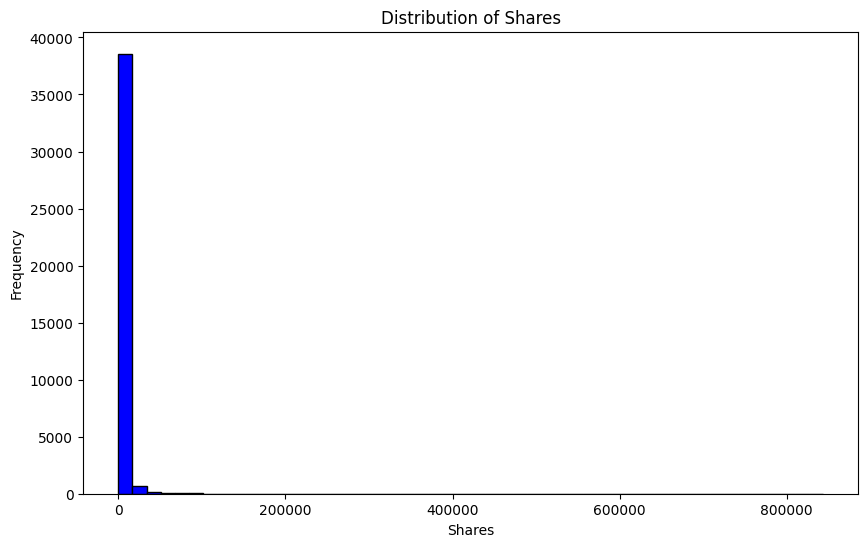

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['shares'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

- most articles in this dataset are shared very few times. Very few articles achieve high share counts, hinting at either a content saturation where only a few articles stand out or a pattern where most content fails to go viral.

  - High Frequency of Low Shares: The tall bar at the very start indicates that a vast majority of articles have a very low share count, close to zero. This suggests that most articles are not widely shared.

  - Sharp Drop-off: There is a dramatic decrease in the frequency as the number of shares increases. The drop is so steep that beyond a certain point, the bars are almost non-existent.

  - Rare High Shares: The near absence of bars beyond the initial one indicates that articles with a high number of shares are exceedingly rare.

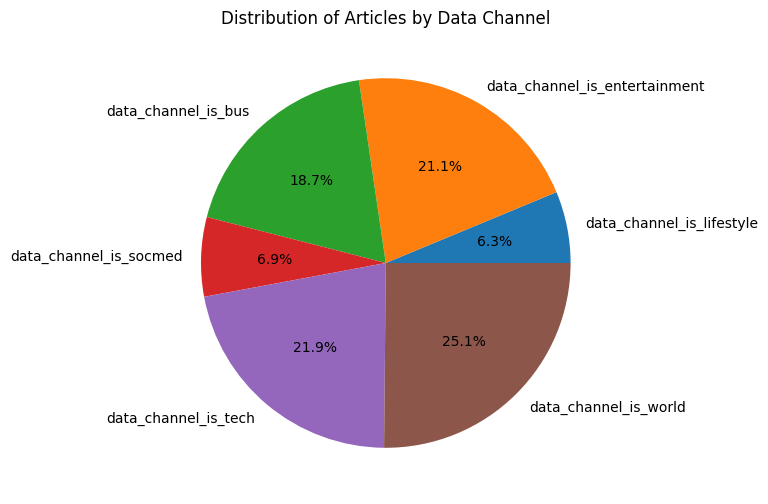

In [ ]:
# Pie chart for one of the data channel columns, say 'data_channel_is_lifestyle'
data_channel_counts = df[['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
                          'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']].sum()

plt.figure(figsize=(10, 6))
plt.pie(data_channel_counts, labels=data_channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Articles by Data Channel')
plt.show()

- the chart shows that articles about world news and technology are the most common, followed by business and entertainment. Social media and lifestyle topics are less frequent in this particular collection of articles.

 - World and Tech: The largest slices belong to 'data_channel_is_world' and 'data_channel_is_tech', each constituting just over a fifth of the total articles. This suggests that world news and technology are the most covered topics.

  - Business and Entertainment: The next significant categories are 'data_channel_is_bus' (business) and 'data_channel_is_entertainment', each with slightly above or below one-fifth of the articles. They represent other key areas of focus.

  - Social Media: 'data_channel_is_socmed' (social media) is the smallest slice, making up just under 7% of the articles, indicating it's the least represented category among the ones shown.

  - Lifestyle: 'data_channel_is_lifestyle' holds a small portion as well, contributing to a minor share of the content.

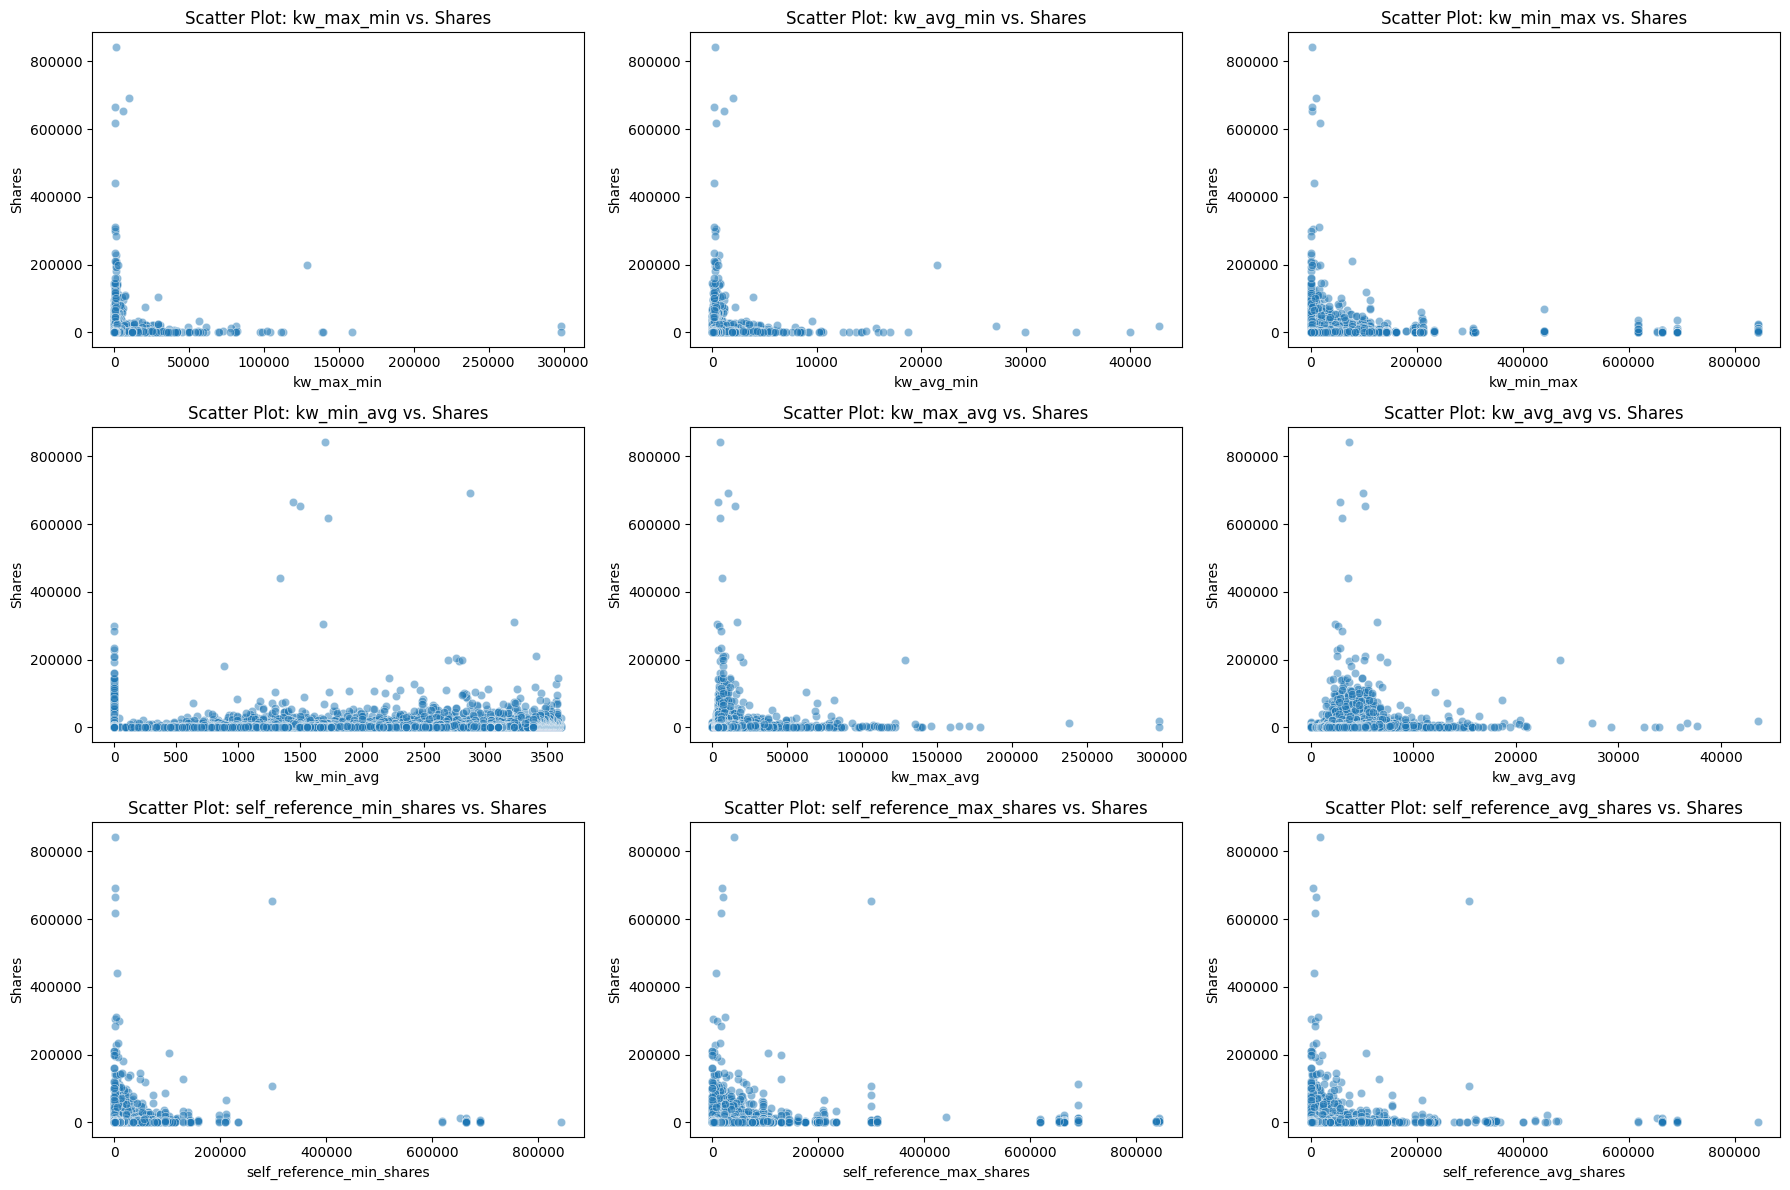

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant keyword columns
keyword_columns = df.columns[19:28]

# Create subplots for each keyword
plt.figure(figsize=(18, 12))
for i, keyword in enumerate(keyword_columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=keyword, y='shares', data=df, alpha=0.5)
    plt.title(f'Scatter Plot: {keyword} vs. Shares')
    plt.xlabel(keyword)
    plt.ylabel('Shares')

# Adjust subplot layout
plt.tight_layout()
plt.show()

- Across all the scatter plots, there is a concentration of data points near the lower values for both keyword metrics and shares, with no strong linear relationship evident. While there are some articles with a high number of shares, these do not seem to be directly associated with the keyword metrics provided, at least not in a way that a simple scatter plot can reveal. There are outliers with high shares, but they are relatively few and do not follow a clear pattern with respect to keyword metrics.

  - kw_min_min vs. Shares: Shows a concentration of data points near the origin with no clear pattern. Most values are low for both shares and the minimum of the minimum keywords, suggesting that this metric doesn't have a strong linear relationship with shares.

  - kw_max_min vs. Shares: This plot also clusters near the origin but with some data points extending to high share values. It indicates that articles with higher minimum maximum keyword values do not necessarily get more shares.

  - kw_avg_min vs. Shares: Similarly, most of the data is clustered at the lower end, and there's no distinct trend, suggesting that the average minimum keyword value has little to no linear correlation with shares.

  - kw_min_max vs. Shares: There's a wide spread of points. While most are still near the bottom, the highest shares are associated with a broad range of minimum maximum keyword values.

  - kw_max_max vs. Shares: This plot shows a vertical cluster of points at lower keyword values, with some outliers showing very high shares. There appears to be no consistent trend.

  - kw_avg_max vs. Shares: The distribution of points is similar to the kw_max_max plot, with a cluster at the lower end and outliers that do not suggest a clear relationship between average maximum keyword values and shares.

  - kw_min_avg vs. Shares: Points are concentrated towards the lower left with no clear trend, implying little to no linear relationship between the minimum average keyword values and the number of shares.

  - kw_max_avg vs. Shares: This plot shows a more dispersed set of points across the range of shares, with a few outliers having a high number of shares. No clear linear pattern is visible.

  - kw_avg_avg vs. Shares: A dense cluster at the lower end of both axes suggests that the average average keyword value typically has low shares, with no apparent linear relationship.

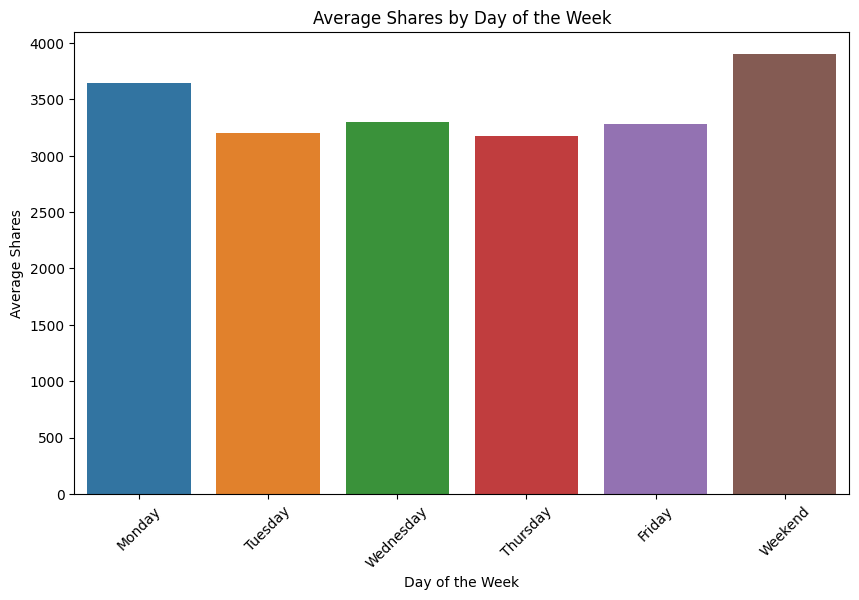

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns for the days of the week and is_weekend (excluding Saturday and Sunday)
day_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'is_weekend']

# Initialize an empty list to store DataFrames
shares_by_day = []

# Mapping of column names to day names
day_mapping = {
    'weekday_is_monday': 'Monday',
    'weekday_is_tuesday': 'Tuesday',
    'weekday_is_wednesday': 'Wednesday',
    'weekday_is_thursday': 'Thursday',
    'weekday_is_friday': 'Friday',
    'is_weekend': 'Weekend'
}

# Loop through each day, calculate the average shares for articles published on that day, and append to the list
for day in day_columns:
    day_name = day_mapping[day]
    average_shares = df[df[day] == 1]['shares'].mean()
    shares_by_day.append(pd.DataFrame({'Day of the Week': [day_name], 'Average Shares': [average_shares]}))

# Concatenate the list of DataFrames into one DataFrame
shares_by_day_df = pd.concat(shares_by_day, ignore_index=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the Week', y='Average Shares', data=shares_by_day_df)
plt.title('Average Shares by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)
plt.show()

- Content shared on the weekends tends to perform the best in terms of shares, while the middle of the week might be a less optimal time for maximizing shares. Monday is notably a good day for content sharing, coming close to weekend performance.

  - Variation Across the Week: The average shares vary for each day, with the trend indicating some fluctuation.

  - Weekend Popularity: The content published on 'Weekend' (assuming this combines both Saturday and Sunday) receives the highest average shares compared to individual weekdays.

  - Midweek Performance: Wednesday and Thursday show a dip in average shares compared to the rest of the weekdays.

  - Start of the Week: Monday appears to have a strong start with the number of shares being second-highest after the weekend.

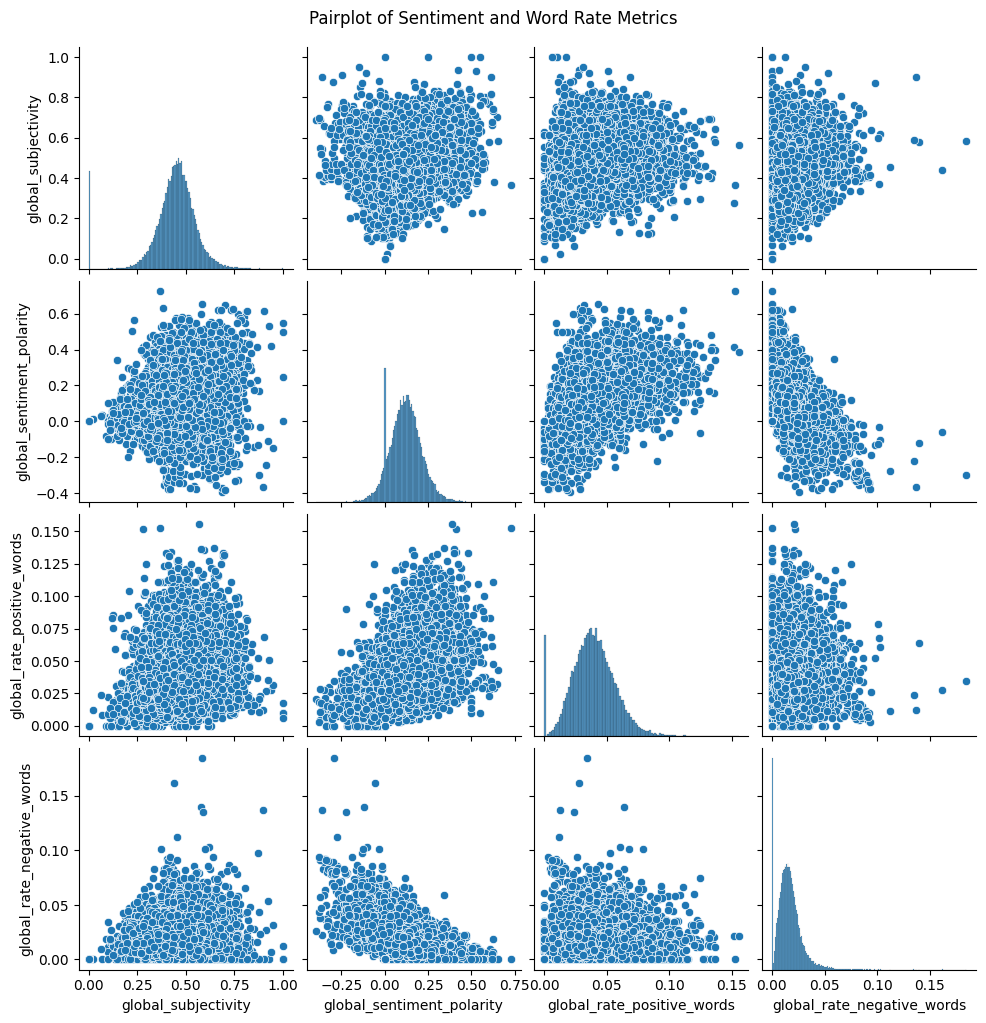

In [ ]:
sns.pairplot(df[['global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words']])
plt.suptitle('Pairplot of Sentiment and Word Rate Metrics', y=1.02)
plt.show()

- this pairplot shows us how various measures of sentiment and word usage relate to each other across a body of content. Generally, more subjective content uses more emotional language (both positive and negative), and the balance of positive to negative words in content affects its overall sentiment polarity. There is no strong linear relationship between subjectivity and sentiment polarity, indicating that subjectivity alone does not determine whether the sentiment is positive or negative.

1. Histograms (Diagonal):

  - Global Subjectivity: Most of the data has a subjectivity score around 0.5, which suggests that the content is somewhat subjective.
 - Global Sentiment Polarity: The sentiment polarity has a large peak around zero, indicating many neutral sentiments, but with a spread towards positive and negative, suggesting variability in sentiment across the dataset.
 - Global Rate of Positive Words: There's a peak near the lower end, showing that most of the content has a low proportion of positive words.
 - Global Rate of Negative Words: Similarly, there's a peak near the lower end, indicating that a low proportion of negative words is common in the content.

2. Scatter Plots (Off-Diagonal):

 - Global Subjectivity vs. Global Sentiment Polarity: The scatter plot appears to show a cloud of points without a clear linear pattern, suggesting that subjectivity and overall sentiment are not strongly linearly correlated.
 - Global Subjectivity vs. Global Rate of Positive/Negative Words: These plots show a triangular shape, with higher subjectivity associated with a higher rate of both positive and negative words, suggesting that more subjective content tends to use more emotionally charged words.
 - Global Sentiment Polarity vs. Global Rate of Positive Words: There is a noticeable positive trend, meaning as the rate of positive words increases, so does the sentiment polarity, which is expected since more positive words would contribute to a more positive sentiment.
 - Global Sentiment Polarity vs. Global Rate of Negative Words: Here we see a negative trend, where a higher rate of negative words corresponds with a more negative sentiment polarity. This also aligns with expectations, as more negative words would typically mean a more negative sentiment.
 - Global Rate of Positive Words vs. Global Rate of Negative Words: There's a wide scatter with a slight negative trend, which could imply that texts with a higher rate of positive words tend to have a lower rate of negative words, and vice versa.

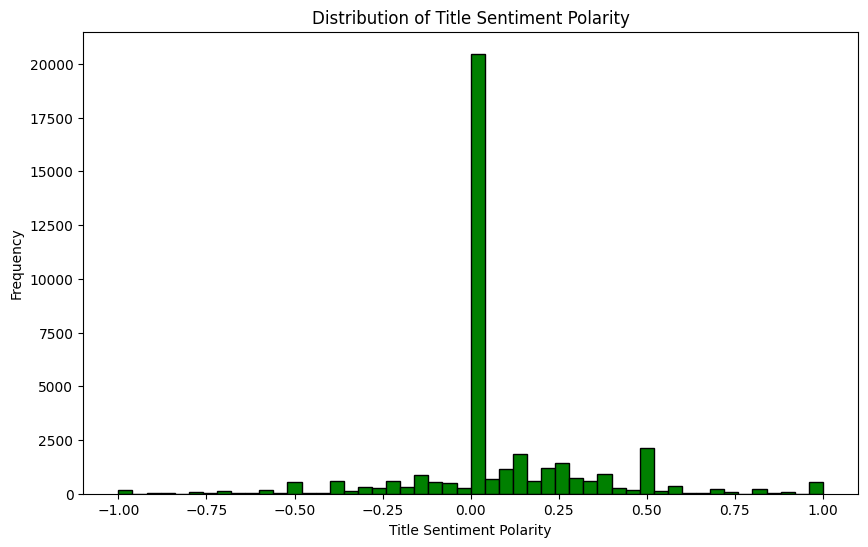

In [ ]:
# Histogram for title sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(df['title_sentiment_polarity'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Title Sentiment Polarity')
plt.xlabel('Title Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

- most of the titles in this dataset tend to be neutral, with fewer titles showing clear positive or negative emotions. There are some titles with positive or negative sentiments, but these are less common compared to neutral ones.

 - High Frequency of Neutral Titles: The tallest bar at 0 indicates that a significant portion of the titles have a neutral sentiment, as this bar far exceeds the frequency of any other sentiment values.

 - Symmetry in Positive and Negative Sentiments: There are bars on both the negative and positive sides of the neutral sentiment, indicating that there are titles with both positive and negative sentiments present in the dataset.

 - Lower Frequency of Strong Sentiments: As the sentiment values move further from 0 (either towards -1 or 1), the frequency of titles decreases. This suggests that strongly negative or positive titles are less common.

 - Slight Skew Towards Positive Sentiments: There appears to be a small number of bars on the positive side that are slightly taller than their negative counterparts, which might indicate a mild skew towards positive sentiments in titles.

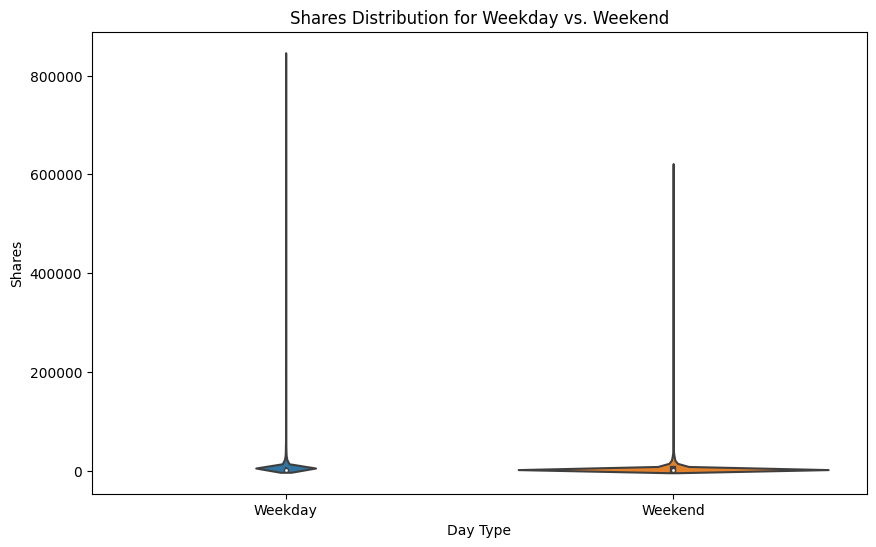

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for day type
df['day_type'] = df['is_weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')

# Now, let's create a violin plot to show the distribution of shares between weekdays and weekends
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_type', y='shares', data=df)
plt.title('Shares Distribution for Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Shares')
plt.show()

- while most content gets a low to moderate number of shares regardless of being published on a weekday or weekend, there are rare instances of content that gets shared a lot. The distribution shapes are similar for both weekdays and weekends, suggesting that the day of the week might not be a major differentiator in how much content is shared.

 - Concentration of Data: For both weekdays and weekends, most of the shares are concentrated near the lower end of the scale. This is indicated by the thick part of the violin near the bottom for both categories.

 - Outliers : There are some content pieces with very high share counts for both weekdays and weekends, as shown by the thin lines (whiskers) extending upwards from both violins.

 - Similarity in Distribution: The distribution shape for both weekdays and weekends is quite similar, with a wide base at the bottom that quickly narrows as the number of shares increases. This suggests that the behavior of sharing content does not drastically change from weekdays to weekends.

 - Weekend Shares: The distribution for weekends seems to have a slightly wider base at the lower end, which could indicate a marginally higher frequency of content with a low number of shares compared to weekdays.

 - Sparse High Shares: The sparse data points at the upper end of the plot indicate that high-share content is rare. This is characterized by the long, thin tails of both violins.

##Removing irrelavent/redundant columns

In [ ]:
df.drop(columns=['url', 'weekday_is_saturday', 'weekday_is_sunday'], inplace=True)

Reason for removal:

url - link to the article does not impact the number of shares
weekday_is_saturday and weekday_is_sunday - They are redundant columns as column 'is_weekend' says whether the article was published on a weekend

In [ ]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593.0
2,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711.0
3,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500.0
4,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200.0


#Univariate analysis - Boxplots

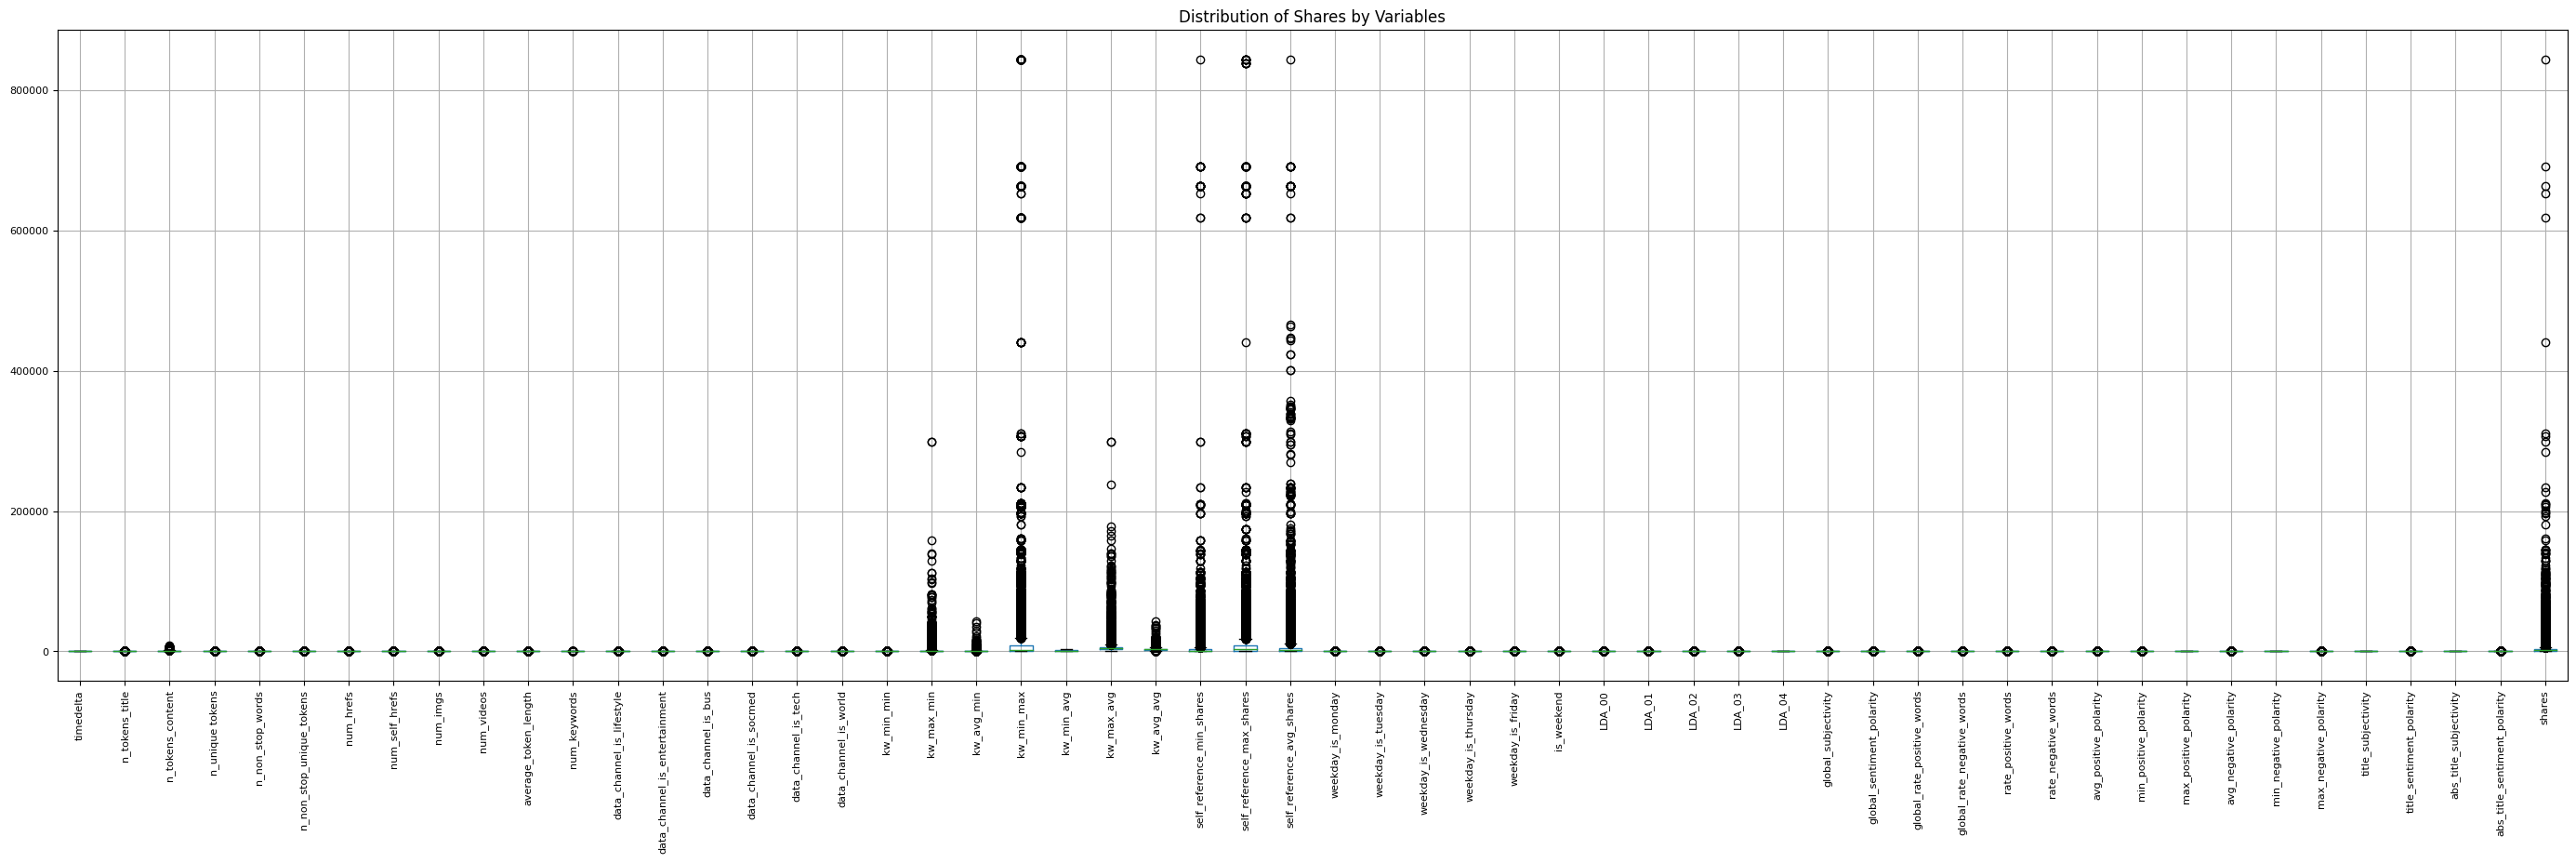

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size to adjust the overall plot size
plt.figure(figsize=(30, 10))  # Width, height in inches

# Create a boxplot with increased horizontal spacing
boxplot = df.boxplot(rot=90)  # Rotate the x-tick labels for better visibility

# Increase horizontal spacing between boxes
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.25, top=0.95, wspace=0.2)

# Optionally increase font size of the x and y axis labels
plt.xticks(fontsize=8)  # Adjust fontsize as needed
plt.yticks(fontsize=8)  # Adjust fontsize as needed

# Optionally set a title for the plot
plt.title('Distribution of Shares by Variables', fontsize=12)

# Show the plot
plt.show()

- Most variables have their medians very close to the bottom of the box, which suggests that shares are generally low across the dataset. The presence of outliers across many variables indicates that there are articles that receive significantly more shares than the average, but these are exceptions rather than the rule.

#Examining effect of the outliers

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Define a function to calculate the outlier threshold
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outlier_thresh = Q3 + 1.5 * IQR
    return column > outlier_thresh

# Analyze outliers for each specified column
outlier_columns = ['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
                   'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
                   'self_reference_max_shares', 'self_reference_avg_shares']

# Initialize an empty list to hold dataframes of outliers
outlier_dataframes = []

for col in outlier_columns:
    if col in df.columns:
        outliers = df.loc[find_outliers(df[col]), :].copy()
        outliers['outlier_in'] = col  # Add a column to indicate which variable the outliers are from
        outlier_dataframes.append(outliers)

# Concatenate all the outlier dataframes
outlier_articles = pd.concat(outlier_dataframes, ignore_index=True)

# Now you can analyze 'outlier_articles' DataFrame
# Print the first few rows as an example
print(outlier_articles.head())

   timedelta  n_tokens_title  n_tokens_content  n_unique tokens  \
0      730.0            12.0             288.0         0.589474   
1      730.0            10.0             414.0         0.606796   
2      730.0            11.0             134.0         0.702290   
3      730.0            11.0             281.0         0.610714   
4      730.0            12.0             499.0         0.513026   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.726190        5.0             2.0   
1               1.0                  0.777344        8.0             0.0   
2               1.0                  0.785714        4.0             2.0   
3               1.0                  0.766467        5.0             4.0   
4               1.0                  0.662252       14.0             1.0   

   num_imgs  num_videos  ...  avg_negative_polarity  min_negative_polarity  \
0       0.0         0.0  ...              -0.366667           

- 'kw_min_min' likely represents the minimum number of times the least frequent keywords appear in the articles. Outliers in this column suggest that there are articles where the least frequent keywords appear more often than usual.
These outliers could be of interest because they might represent articles with unusual or niche content, which could resonate with specific audiences and result in higher share counts.

In [ ]:
import pandas as pd

# Function to calculate outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# List of your keyword columns
keyword_columns = ['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max']

# Loop through each keyword column and find outliers
for column in keyword_columns:
    outliers_df = find_outliers(df, column)
    print(f"Outliers for {column}:\n", outliers_df[[column, 'shares']])

Outliers for kw_min_min:
        kw_min_min  shares
80          217.0   755.0
81          217.0   468.0
82          217.0  4600.0
83          217.0  1300.0
84          217.0  1200.0
...           ...     ...
21828        86.0  1100.0
23089        88.0   798.0
23258        80.0  2400.0
23326        97.0  1200.0
23692        88.0  6500.0

[4677 rows x 2 columns]
Outliers for kw_max_min:
        kw_max_min   shares
88         5700.0   1200.0
101        2100.0   1200.0
105        3600.0    971.0
108        1900.0   1900.0
110        2600.0   1100.0
...           ...      ...
39582      1900.0   1000.0
39588      4100.0   1200.0
39591      3100.0   4400.0
39622      2000.0  24300.0
39626      3400.0   1400.0

[3661 rows x 2 columns]
Outliers for kw_avg_min:
         kw_avg_min  shares
88     1006.875000  1200.0
101     937.600000  1200.0
105    1201.750000   971.0
108     748.200000  1900.0
110     889.250000  1100.0
...            ...     ...
39518  1845.750000  3100.0
39519  2132.666667  

<Axes: >

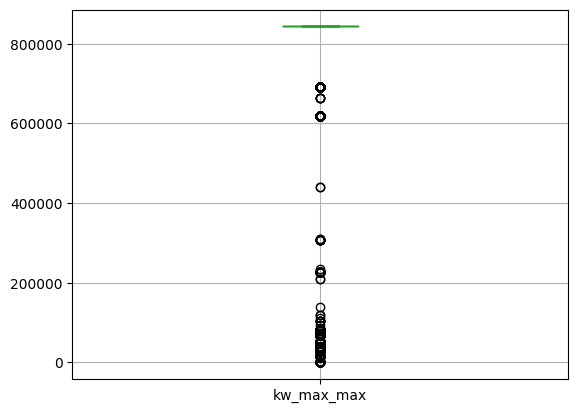

In [ ]:
df.boxplot('kw_max_max')

<Axes: >

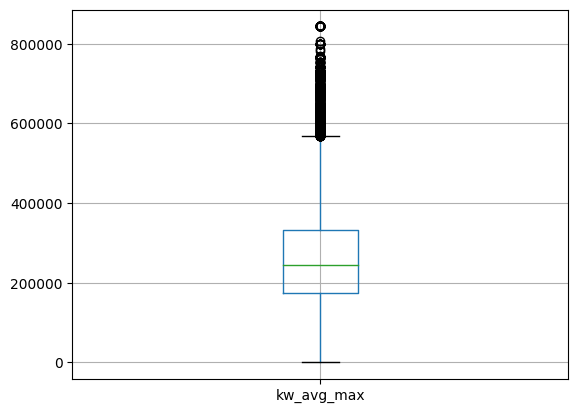

In [ ]:
df.boxplot('kw_avg_max')

As seen from the boxplots above, 'kw_max_max' and 'kw_avg_max' lie on a much higher scale than the rest of the variables. Hence we decided to remove them.



In [ ]:
df.shape

(39645, 56)

Our dataset now has 56 columns from 61

##Removing outlier rows from boxplot

<Axes: >

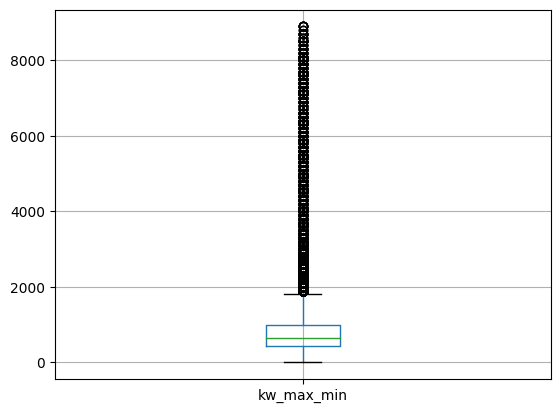

In [ ]:
threshold = 9000
df_scaled = df[df['kw_max_min'] < threshold]
df_scaled.boxplot('kw_max_min')

<Axes: >

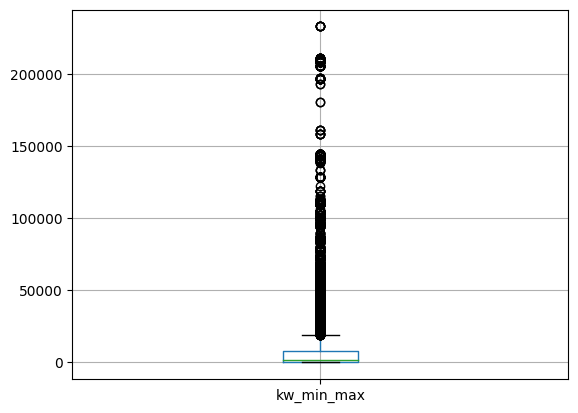

In [ ]:
threshold = 250000
df_scaled = df[df['kw_min_max'] < threshold]
df_scaled.boxplot('kw_min_max')

<Axes: >

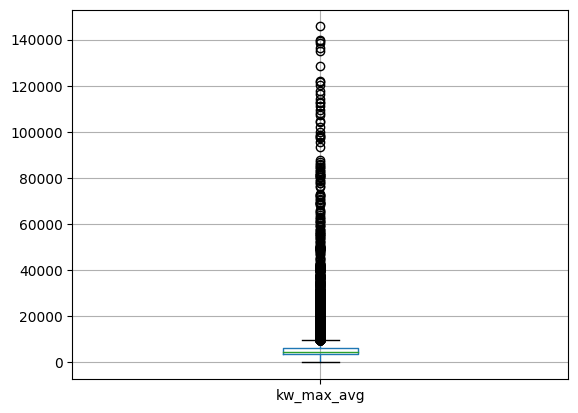

In [ ]:
threshold = 150000
df_scaled = df[df['kw_max_avg'] < threshold]
df_scaled.boxplot('kw_max_avg')

<Axes: >

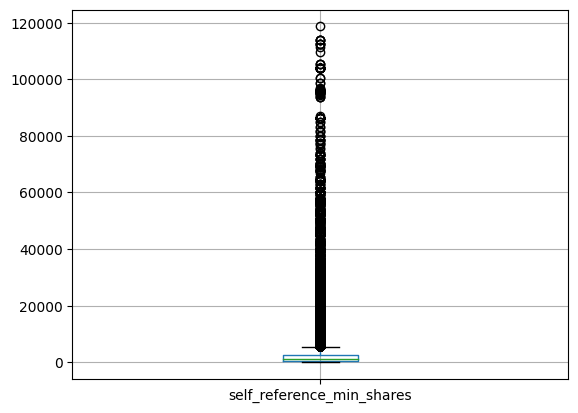

In [ ]:
threshold = 125000
df_scaled = df[df['self_reference_min_shares'] < threshold]
df_scaled.boxplot('self_reference_min_shares')

<Axes: >

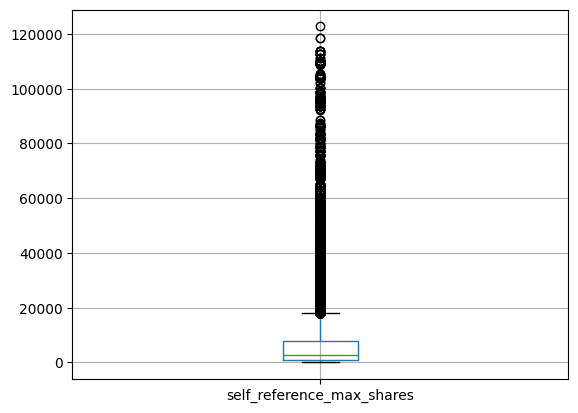

In [ ]:
threshold = 125000
df_scaled = df[df['self_reference_max_shares'] < threshold]
df_scaled.boxplot('self_reference_max_shares')

<Axes: >

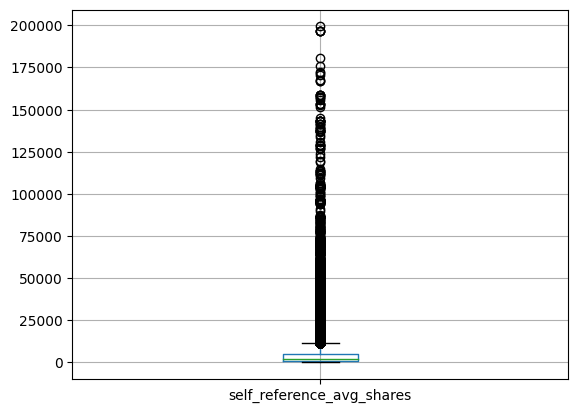

In [ ]:
threshold = 200000
df_scaled = df[df['self_reference_avg_shares'] < threshold]
df_scaled.boxplot('self_reference_avg_shares')

In [ ]:
df_scaled.shape

(39547, 56)

In [ ]:
print(df_scaled.columns)

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'a

Our original dataset had 39,645 rows. After removing some outliers we were left with 39,547 rows. Hence we stuck to best practice of not removing more than 5% of rows.

#Bivariate Analysis - Correlation Matrix

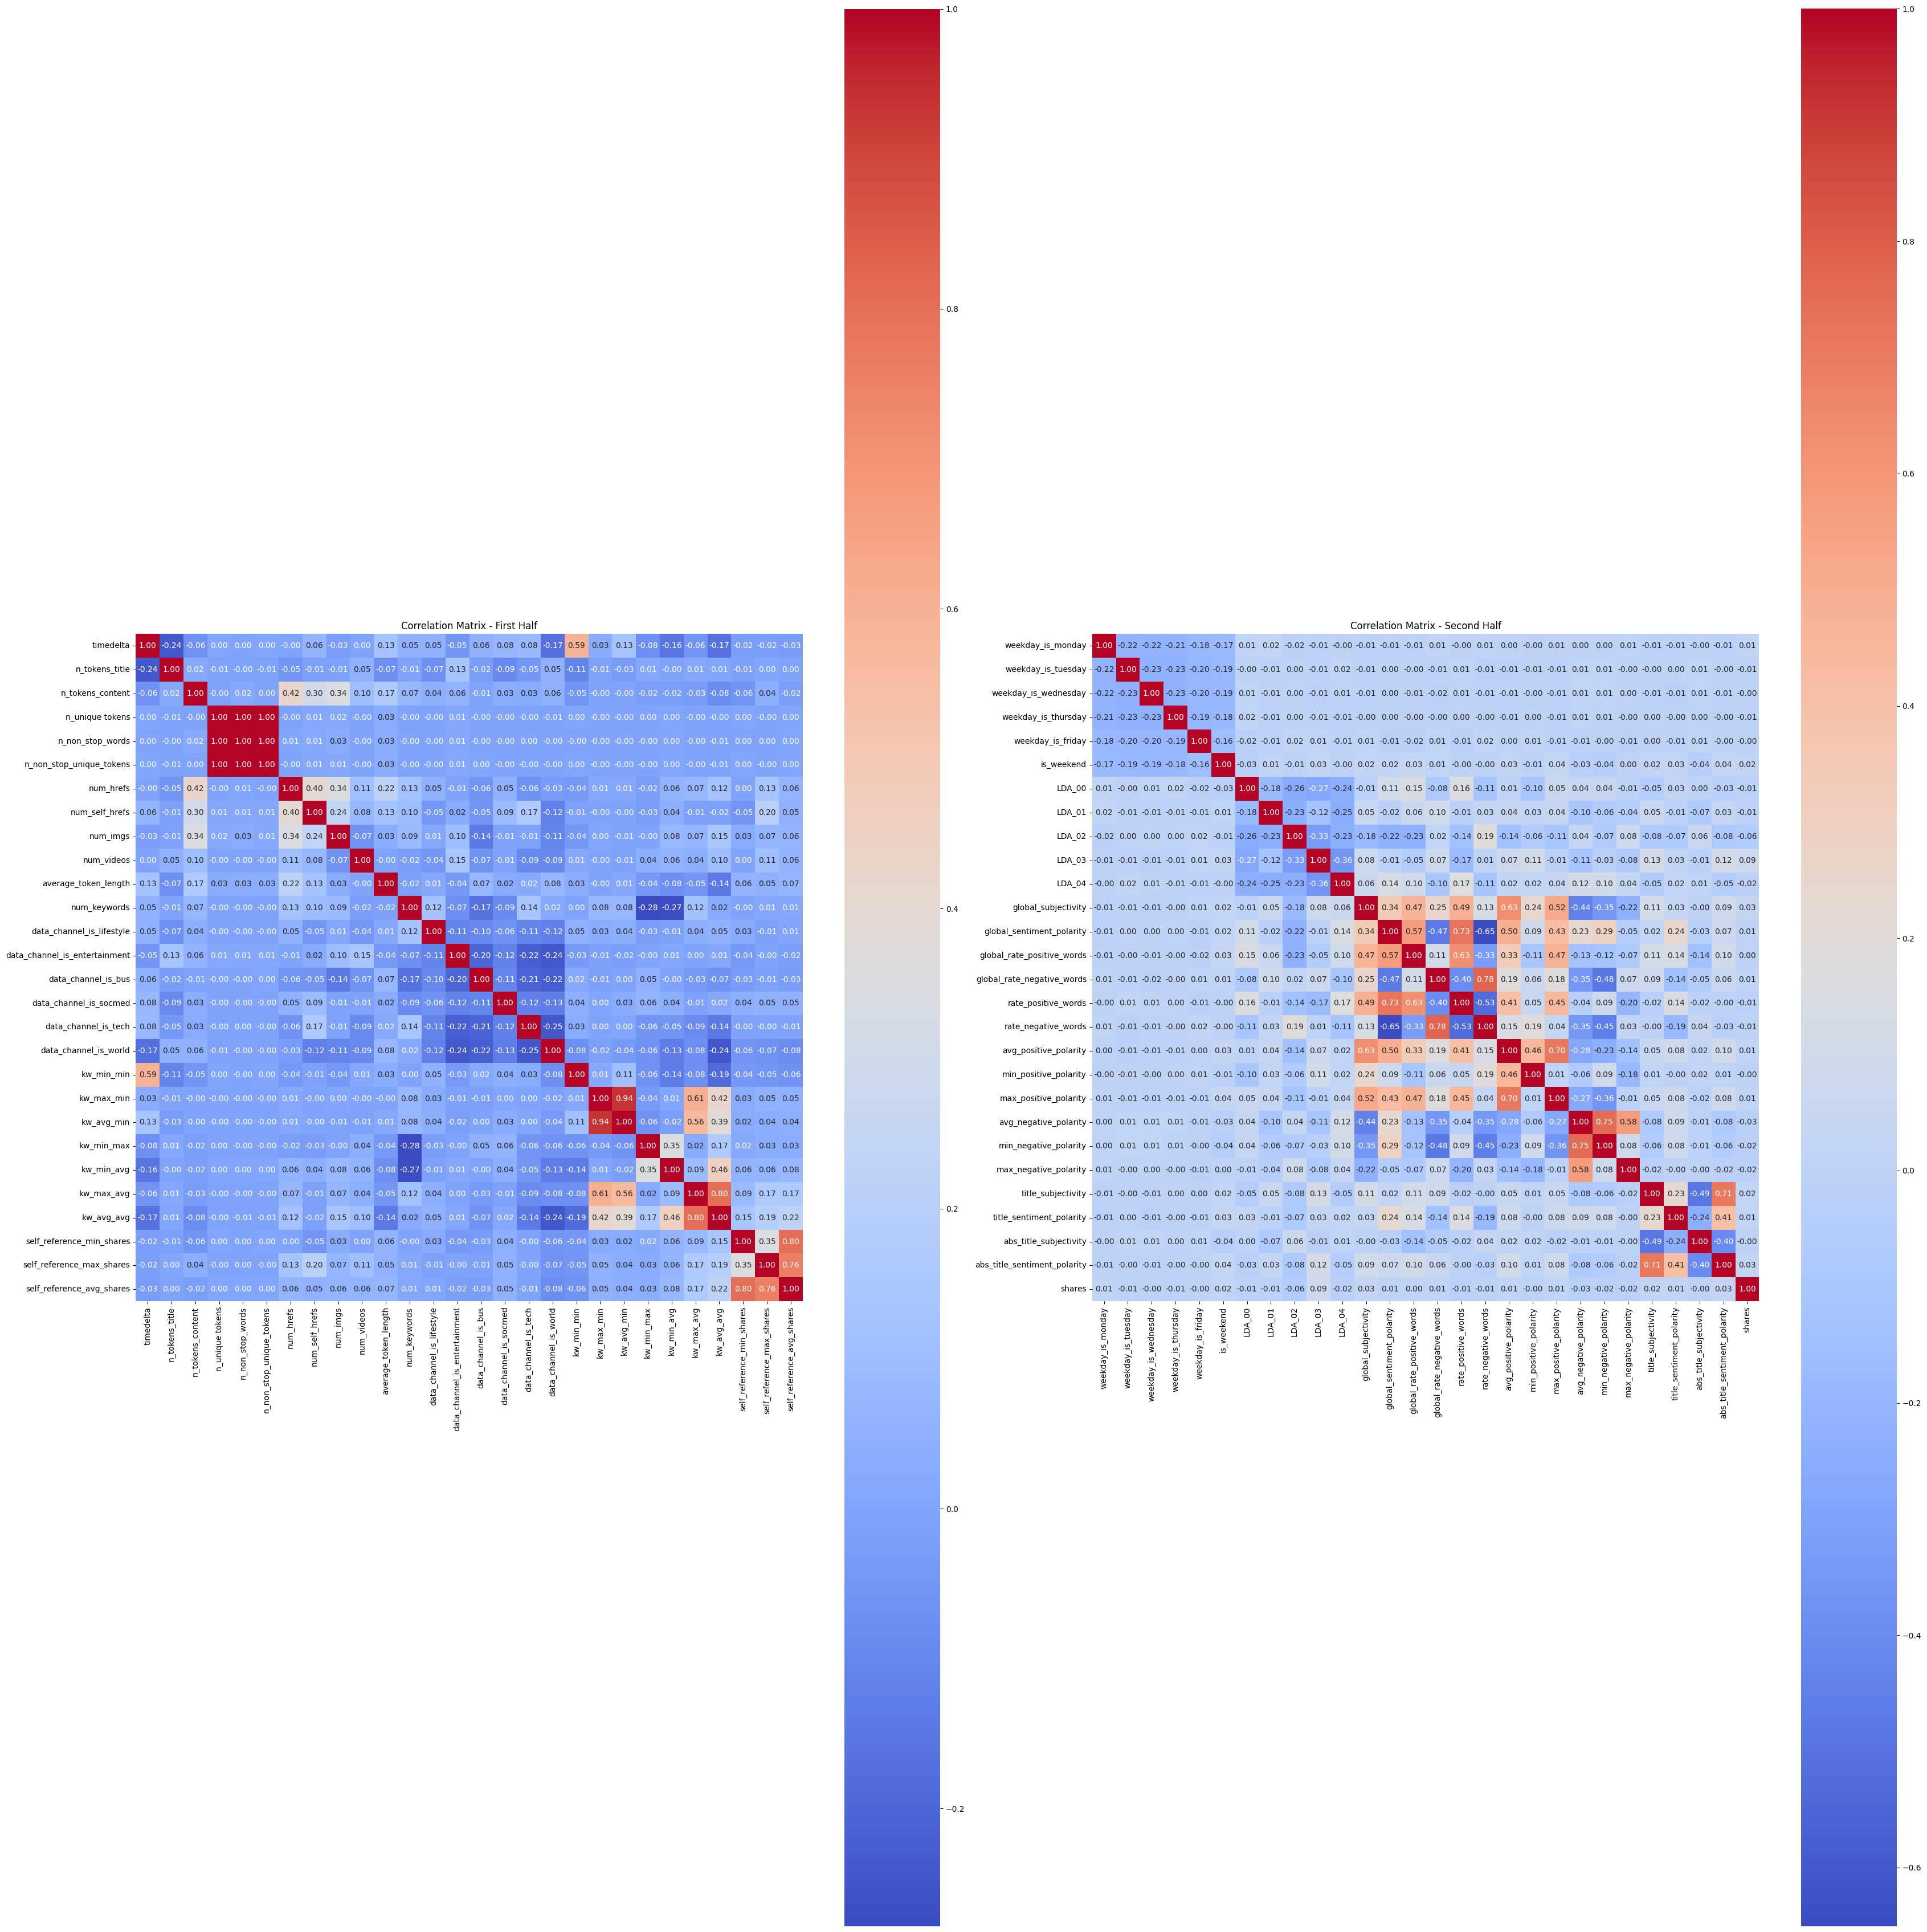

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scaled is your DataFrame containing numerical columns
# Create a correlation matrix
correlation_matrix = df_scaled.corr()

# Get the number of columns in the correlation matrix
num_cols = correlation_matrix.shape[1]

# Split the correlation matrix into two halves
split_index = num_cols // 2

# Create separate correlation matrices for each half
first_half = correlation_matrix.iloc[:split_index, :split_index]
second_half = correlation_matrix.iloc[split_index:, split_index:]

# Set up the matplotlib figures and axes
fig, ax = plt.subplots(1, 2, figsize=(34, 34))

# Plot the first half of the correlation matrix
sns.heatmap(first_half, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax[0])
ax[0].set_title('Correlation Matrix - First Half')

# Plot the second half of the correlation matrix
sns.heatmap(second_half, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax[1])
ax[1].set_title('Correlation Matrix - Second Half')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()

#Correlation Matrix
Positive Correlation:

1. Correlation between `n_non_stop_unique_tokens` and `n_non_stop_words` (1.0):
   
   There exists a perfect positive correlation (1.0) between these two variables, indicating a robust relationship. As the count of `n_non_stop_tokens` increases, the count of `n_non_stop_words` tends to increase proportionally, and vice versa.

2. Correlation between `data_channel_is_world` and `LDA_02` (0.84):
   
   A strong positive correlation (0.84) is observed between `data_channel_is_world` and `LDA_02`. This implies that as the likelihood of the content belonging to the "world" channel increases, the value of `LDA_02` tends to increase as well, and vice versa.

3. Correlation between `self_reference_avg_shares` and `self_reference_max_shares` (0.76):
   
   The two variables exhibit a substantial positive correlation (0.76), suggesting that an increase in `self_reference_avg_shares` is associated with a corresponding increase in `self_reference_max_shares`, and vice versa.

Weak Correlation:

1. Correlation between self_reference_max_shares and kw_min_avg (0.06):

A correlation coefficient of 0.06 indicates a very weak positive correlation between self_reference_max_shares and kw_min_avg. However, the strength of this association is minimal, suggesting that the relationship may not be practically significant.

2. Correlation between max_positive_polarity and num_keywords (0.06):

The correlation coefficient of 0.06 implies a weak positive association between max_positive_polarity and num_keywords. Despite this weak positive correlation, the strength of the association is modest, and the relationship may not be very pronounced.

3. Correlation between title_subjectivity and data_channel_is_entertainment (0.00):

A correlation coefficient of 0.00 indicates no linear correlation between changes in title_subjectivity and predictable changes in the presence of the "entertainment" category in the "data_channel." The absence of a linear association suggests that these variables are not systematically related in a linear manner.



Negative Correlation:


4. Correlation between `min_negative_polarity` and `n_token_content` (-0.4):

   A weak negative correlation (-0.4) is identified between `min_negative_polarity` and `n_token_content`. When `min_negative_polarity` increases, there is a tendency for `n_token_content` to decrease, and vice versa. However, the relationship is not notably strong.

5. Correlation between `avg_negative_polarity` and `average_token_length` (-0.33):**

   In the case of `avg_negative_polarity` and `average_token_length`, a weak negative correlation (-0.33) is noted. An increase in average negative polarity corresponds to a slight decrease in the average length of tokens, and vice versa.

6. Correlation between `min_negative_polarity` and `data_channel_is_entertainment` (-0.11):

   A weak negative correlation (-0.11) between these variables suggests that lower minimum negative polarity is weakly associated with a slightly higher likelihood of the content belonging to the "entertainment" data channel. Conversely, higher minimum negative polarity may be weakly associated with a slightly lower likelihood of the content being classified as "entertainment."

#Multivariate Analysis - Scatter Plots

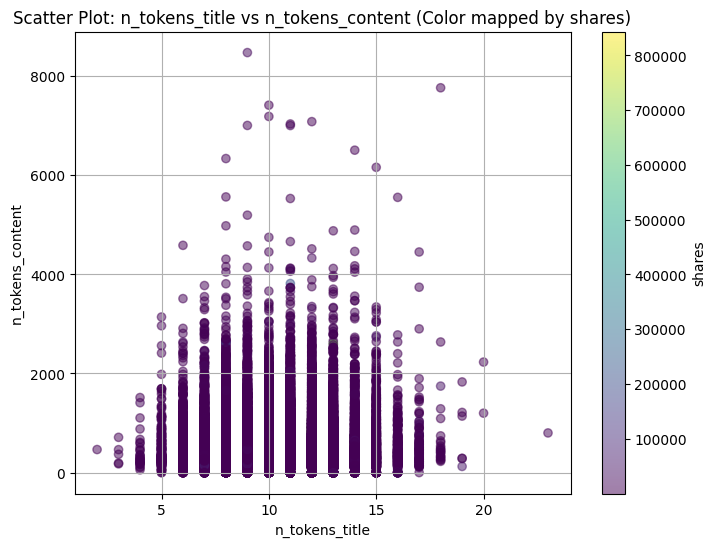

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the mentioned columns
# Selecting three variables for the scatter plot
var1 = 'n_tokens_title'
var2 = 'n_tokens_content'
var3 = 'shares'

# Plotting a scatter plot for the selected variables
plt.figure(figsize=(8, 6))
plt.scatter(df[var1], df[var2], c=df[var3], cmap='viridis', alpha=0.5)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Scatter Plot: {var1} vs {var2} (Color mapped by {var3})')
plt.colorbar(label=var3)
plt.grid(True)
plt.show()

- The scatter plot tells us that shares (of an article) are negligibly impacted by n_tokens_content (number of words in the content) and n_tokens_title (number of words in the title).

- This is because almost all point are shades of purple, equating to a similar amount of shares irrespective of n_tokens_content and n_tokens_title.

- This makes sense because if we look at the correlation of n_tokens_content and n_tokens_title with shares on the correlation matrix, we find that they are very low.

#Model 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_scaled contains the scaled data and 'shares' is the target variable
X = df_scaled.drop(columns=['shares'])  # Features
y = df_scaled['shares']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')


R-squared: 0.0452
Mean Squared Error (MSE): 48833545.8363


R-squared of 0.0452 and MSE of 48833545.8363 indicates that Model 1 is VERY POOR. The low R-squared means that the model only captures a varience of around 4.52% (we want our model to capture the highest varience). The high MSE of 48833545.8363 indicates that the model mispredicts either 48833545.8363 shares too high or too low

#Using regression as a feature selection

#Coefficients

In [ ]:
# Accessing the intercept of the model
intercept = model.intercept_
print(f"Intercept: {intercept:.4f}")

# Accessing the coefficients of the model
coefficients = model.coef_
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Intercept: 2099457.9958
Coefficients:
timedelta: 1.8232
n_tokens_title: 125.7005
n_tokens_content: 0.6992
n_unique tokens: 1780.2679
n_non_stop_words: -3018.0038
n_non_stop_unique_tokens: -308.3190
num_hrefs: 26.8630
num_self_hrefs: -70.5202
num_imgs: 10.9231
num_videos: 5.3199
average_token_length: -290.0844
num_keywords: 66.8841
data_channel_is_lifestyle: -1262.3577
data_channel_is_entertainment: -1172.9118
data_channel_is_bus: -1072.5081
data_channel_is_socmed: -768.4179
data_channel_is_tech: -586.6443
data_channel_is_world: -484.7484
kw_min_min: 1.6234
kw_max_min: 0.0542
kw_avg_min: -0.3780
kw_min_max: -0.0030
kw_min_avg: -0.3161
kw_max_avg: -0.1846
kw_avg_avg: 1.5211
self_reference_min_shares: 0.0153
self_reference_max_shares: 0.0003
self_reference_avg_shares: 0.0428
weekday_is_monday: 309.0131
weekday_is_tuesday: -172.5844
weekday_is_wednesday: -15.2960
weekday_is_thursday: -239.0132
weekday_is_friday: -201.4972
is_weekend: 319.3778
LDA_00: -2100476.6051
LDA_01: -2101563.8067
LDA

Based on the coefficients of all the X variables, the following are the most important features:

- n_unique tokens: 1780.2679
- global_subjectivity: 2462.6119
- global_sentiment_polarity: 2107.0963
- rate_positive_words: 2130.9107
- rate_negative_words: 2846.1486

These X variables had the highest coefficients with rate_negative_words having the most significance (2846.1486)

The intercept of 2099457.9958 tells us the value of the target variable when all predictor/X variables are 0

#P-values

In [ ]:
import statsmodels.api as sm

# Assuming you already have X_train and y_train

# Adding a constant term for intercept
X_train_with_intercept = sm.add_constant(X_train)

# Fit Ordinary Least Squares (OLS) model
ols_model = sm.OLS(y_train, X_train_with_intercept).fit()

# Extract p-values for specific features
features_of_interest = ['num_self_hrefs', 'data_channel_is_lifestyle', 'data_channel_is_bus', 'self_reference_avg_shares', 'global_subjectivity']
p_values = ols_model.pvalues[features_of_interest]

# Print p-values
print(p_values)


num_self_hrefs               1.301953e-01
data_channel_is_lifestyle    9.510055e-01
data_channel_is_bus          3.984259e-02
self_reference_avg_shares    2.372385e-37
global_subjectivity          8.513961e-05
dtype: float64


1. num_self_hrefs: p-value = 0.1302

The p-value is greater than the common significance level (e.g., 0.05), indicating that there is insufficient evidence to reject the null hypothesis. Therefore, this feature may not be statistically significant in explaining the variability in the target variable.
2. data_channel_is_lifestyle: p-value = 0.9510

The p-value is much greater than 0.05, suggesting that this feature is not statistically significant. It may not have a significant impact on the target variable.
data_channel_is_bus: p-value = 0.0398

The p-value is less than 0.05, indicating that this feature is statistically significant. There is evidence to suggest that data_channel_is_bus has a significant impact on the target variable.
3. self_reference_avg_shares: p-value = 2.3724e-37

The p-value is extremely small, close to zero. This indicates strong evidence against the null hypothesis, suggesting that self_reference_avg_shares is highly statistically significant and has a significant impact on the target variable.
4. global_subjectivity: p-value = 8.5140e-05

The p-value is very small, indicating that global_subjectivity is statistically significant. There is strong evidence to suggest that this feature has a significant impact on the target variable.

#Model 1.5 using most important features from coefficients

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded your dataset and selected the features
# X = your feature matrix (containing 'num_hrefs', 'global_subjectivity', and 'n_tokens_title')
# y = your target variable (e.g., 'shares')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 48833545.83625091
R-squared (R2): 0.0452256900619149


Model 1.5 with chosen X variables based on coefficients gave us a much lower R-squared and a much higher MSE, making it worse than model 1

#Model 1.6 using selected features from p values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_scaled contains the scaled data and 'shares' is the target variable
X = df_scaled[['num_self_hrefs', 'data_channel_is_lifestyle', 'data_channel_is_bus', 'self_reference_avg_shares', 'global_subjectivity']]  # Features
y = df_scaled['shares']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

R-squared: 0.0142
Mean Squared Error (MSE): 50422463.5340


Model 1.6 with chosen X variables based on p values was better than Model 1.5 but worse than the original Model

#Model 2 using K-Best (k=25)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_scaled contains the scaled data and 'shares' is the target variable
X = df_scaled.drop(columns=['shares'])  # Features
y = df_scaled['shares']  # Target variable

# Selecting top 20 features using SelectKBest and f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=25)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]
print("Top 20 selected features:")
print(selected_features)

# Splitting the selected features into train and test sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model with selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train)

# Predicting on the test set with selected features
y_pred_sel = model_sel.predict(X_test_sel)

# Calculating R-squared with selected features
r2_sel = r2_score(y_test, y_pred_sel)
print(f'New R-squared with selected features: {r2_sel:.4f}')

# Calculating Mean Squared Error (MSE) with selected features
mse_sel = mean_squared_error(y_test, y_pred_sel)
print(f'New Mean Squared Error (MSE) with selected features: {mse_sel:.4f}')

Top 20 selected features:
Index(['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_shares', 'is_weekend',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')
New R-squared with selected features: 0.0478
New Mean Squared Error (MSE) with selected features: 48700613.6539


Model 2 using K-Best where k=25 only marginally improved our Model. However, the model with K-Best is still VERY POOR. R-squared only went up to 0.0478 and MSE only went down to 48700613.6539

#Model 3 using LASSO (alpha=0.1)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df_scaled contains the scaled data and 'shares' is the target variable
X = df_scaled.drop(columns=['shares'])  # Features
y = df_scaled['shares']  # Target variable

# Fitting Lasso regression with alpha=0.1
lasso = Lasso(alpha=0.8)
lasso.fit(X, y)

# Get the selected features from Lasso
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Features selected by Lasso:")
print(selected_features_lasso)

# Selecting only the Lasso-selected features
X_lasso_selected = X[selected_features_lasso]

# Splitting the Lasso-selected features into train and test sets
X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model with Lasso-selected features
model_lasso = LinearRegression()
model_lasso.fit(X_train_lasso, y_train)

# Predicting on the test set with Lasso-selected features
y_pred_lasso = model_lasso.predict(X_test_lasso)

# Calculating R-squared with Lasso-selected features
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'New R-squared with Lasso-selected features: {r2_lasso:.4f}')

# Calculating Mean Squared Error (MSE) with Lasso-selected features
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'New Mean Squared Error (MSE) with Lasso-selected features: {mse_lasso:.4f}')


Features selected by Lasso:
Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'global_subjectivity', 'global_rate_positive_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_po

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+12, tolerance: 4.921e+08
  model = cd_fast.enet_coordinate_descent(


We tried different alpha terms like 0.1 and 0.8 for LASSO, but we were still retunred with the same number of selected features. This means that regularization effect from LASSO may not be strong enough to force feature selection by zeroing out less important features

Hence LASSO and K-Best don't seem to be useful feature selection methods for this dataset.

R-squared of 0.0457 was negligibly better than Model 1 but negligibly worse than Model 2

MSE of 48807424.3549 was also negligibly better than Model 1 but negligibly worse than Model 2

#PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled contains the scaled data
X = df_scaled.drop(columns=['shares'])  # Features
y = df_scaled['shares']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f}")

Explained Variance Ratio:
Component 1: 0.0882
Component 2: 0.0720
Component 3: 0.0623
Component 4: 0.0546
Component 5: 0.0469
Component 6: 0.0444
Component 7: 0.0408
Component 8: 0.0400
Component 9: 0.0374
Component 10: 0.0349
Component 11: 0.0314
Component 12: 0.0282
Component 13: 0.0251
Component 14: 0.0244
Component 15: 0.0225
Component 16: 0.0224
Component 17: 0.0220
Component 18: 0.0217
Component 19: 0.0216
Component 20: 0.0212
Component 21: 0.0199
Component 22: 0.0183
Component 23: 0.0163
Component 24: 0.0160
Component 25: 0.0149
Component 26: 0.0130
Component 27: 0.0123
Component 28: 0.0117
Component 29: 0.0111
Component 30: 0.0109
Component 31: 0.0102
Component 32: 0.0097
Component 33: 0.0087
Component 34: 0.0084
Component 35: 0.0081
Component 36: 0.0068
Component 37: 0.0065
Component 38: 0.0056
Component 39: 0.0053
Component 40: 0.0044
Component 41: 0.0044
Component 42: 0.0036
Component 43: 0.0033
Component 44: 0.0018
Component 45: 0.0015
Component 46: 0.0014
Component 47: 0.0

We can clearly see that PC1 gives captures the highest varience of 8.82% (even though this is actually relatively low and is not ideal) and as we increase components, the variance begins to decrease.

#Model PC1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_pca contains the transformed principal components
# X_pca[:, 0] refers to the first principal component (PC1)
X_pc1 = X_pca[:, 0].reshape(-1, 1)  # Reshape PC1 into a column vector

# Initialize and fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X_pc1, y)  # Assuming 'y' is your target variable

# Predict the target variable using the linear regression model
y_pred = regression_model.predict(X_pc1)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print the coefficients, intercept, R-squared, and MSE
print(f"Coefficient for PC1: {regression_model.coef_[0]:.4f}")
print(f"Intercept: {regression_model.intercept_:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Coefficient for PC1: 214.3517
Intercept: 3374.1649
R-squared: 0.0018
Mean Squared Error (MSE): 124215887.6559


#Model PC2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_pca contains the transformed principal components
# X_pca[:, 1] refers to the second principal component (PC2)
X_pc2 = X_pca[:, 1].reshape(-1, 1)  # Reshape PC2 into a column vector

# Initialize and fit a linear regression model
regression_model_pc2 = LinearRegression()
regression_model_pc2.fit(X_pc2, y)  # Assuming 'y' is your target variable

# Predict the target variable using the linear regression model with PC2
y_pred_pc2 = regression_model_pc2.predict(X_pc2)

# Calculate R-squared for PC2
r2_pc2 = r2_score(y, y_pred_pc2)

# Calculate Mean Squared Error (MSE) for PC2
mse_pc2 = mean_squared_error(y, y_pred_pc2)

# Print the coefficients, intercept, R-squared, and MSE for PC2
print(f"Coefficient for PC2: {regression_model_pc2.coef_[0]:.4f}")
print(f"Intercept: {regression_model_pc2.intercept_:.4f}")
print(f"R-squared for PC2: {r2_pc2:.4f}")
print(f"Mean Squared Error (MSE) for PC2: {mse_pc2:.4f}")

Coefficient for PC2: 253.2598
Intercept: 3374.1649
R-squared for PC2: 0.0020
Mean Squared Error (MSE) for PC2: 124184935.2648


##Scree Plot

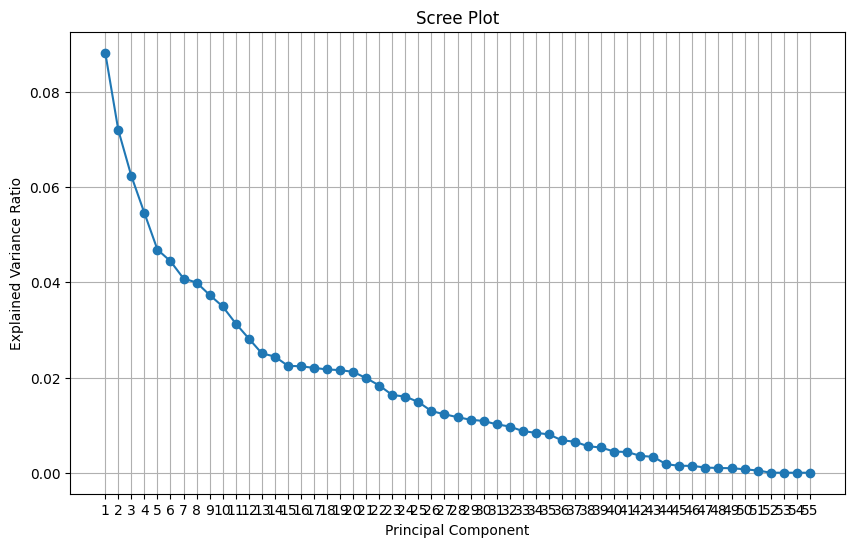

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the scree plot
num_components = len(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_components + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, num_components + 1))
plt.grid(True)
plt.show()

- Based on the scree plot above, we can see that the ideal number of PC's is 5 (based of the elbow point)

#Model 4 with PCA (5 components)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_pca has the PCA-transformed data with 5 components
X_selected = X_pca[:, :5]  # Selecting the first 5 components

# Splitting the data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model with PCA-selected features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predicting on the test set with PCA-selected features
y_pred_pca = model_pca.predict(X_test_pca)

# Calculating R-squared with PCA-selected features
r2_pca = r2_score(y_test, y_pred_pca)
print(f'New R-squared with PCA (5 components): {r2_pca:.4f}')

# Calculating Mean Squared Error (MSE) with PCA-selected features
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'New Mean Squared Error (MSE) with PCA (5 components): {mse_pca:.4f}')


New R-squared with PCA (5 components): 0.0443
New Mean Squared Error (MSE) with PCA (5 components): 48881902.2448


Model 4 with PCA (5 components) gave us an R-squared of 0.0443 and a MSE of 48881902.2448. These values are similar to those of Models 1,2 and 3 with only a negligible difference indicating that these feature selection methods were not useful in trying to improve the accuracy of the model

#Model 5 with PCA (15 components)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_pca has the PCA-transformed data with 5 components
X_selected = X_pca[:, :15]  # Selecting the first 5 components

# Splitting the data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model with PCA-selected features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predicting on the test set with PCA-selected features
y_pred_pca = model_pca.predict(X_test_pca)

# Calculating R-squared with PCA-selected features
r2_pca = r2_score(y_test, y_pred_pca)
print(f'New R-squared with PCA (5 components): {r2_pca:.4f}')

# Calculating Mean Squared Error (MSE) with PCA-selected features
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'New Mean Squared Error (MSE) with PCA (5 components): {mse_pca:.4f}')

New R-squared with PCA (5 components): 0.0405
New Mean Squared Error (MSE) with PCA (5 components): 49073874.5050


#Model 6 PCA (42 components)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_pca has the PCA-transformed data with 5 components
X_selected = X_pca[:, :45]  # Selecting the first 5 components

# Splitting the data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model with PCA-selected features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predicting on the test set with PCA-selected features
y_pred_pca = model_pca.predict(X_test_pca)

# Calculating R-squared with PCA-selected features
r2_pca = r2_score(y_test, y_pred_pca)
print(f'New R-squared with PCA (5 components): {r2_pca:.4f}')

# Calculating Mean Squared Error (MSE) with PCA-selected features
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'New Mean Squared Error (MSE) with PCA (5 components): {mse_pca:.4f}')

New R-squared with PCA (5 components): 0.0412
New Mean Squared Error (MSE) with PCA (5 components): 49038408.0457


- Even PC 15 and PC 42 have similar results in terms of model performance, negligibly improving R-squared and MSE

#Conclusion

The above project invloved conducting an EDA and then using feature selection mtheods to create different models to see if they can help improve model performance based on metrics such as R-squared and MSE.

However, after using a K-Best, LASSO and PCA we found that all 3 feature selection methods were not useful in improving the performance of the original model as the R-squared and MSE values only negligibly changed with each model.

Overall all models created were VERY POOR in terms of performance and accuracy.

Hence the models created are not reliable at predicting the actual number of times an article was shared.